In [1]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [2]:
#Ler o arquivo
#Caso use o dataset na sua base garanta que o arquivo foi importado para o Colab e substitua a linha de leitura pela seguinte linha:
#df = pd.read_csv('./sms_senior.csv', encoding= 'unicode_escape')
df = pd.read_csv('http://llcunha.com/sms_senior.csv', encoding= 'unicode_escape')

1. Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras,
nuvem de palavras, etc).

---



In [3]:
#Cria uma serie apenas com as palavras comuns e soma toda a coluna para ter a quantidade total de cada palavra
#Apos isso transforma a serie em um data frame com a coluna palavra, que contem a palavra e a coluna total que contem a quantidade de aparicoes
serieTotalPalavras = df.drop(['Full_Text', 'Common_Word_Count', 'Word_Count', 'Date', 'IsSpam'], axis=1).sum()
totalPalavras_df = serieTotalPalavras.to_frame(name='total')
totalPalavras_df['palavra'] = totalPalavras_df.index

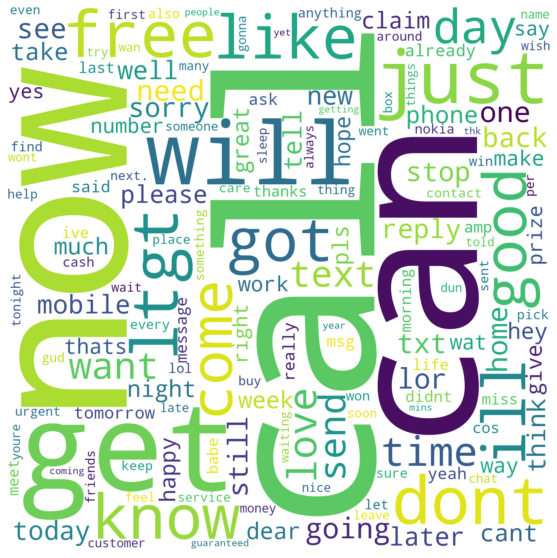

In [4]:
#Transforma a tabela em um dicionario em que a palavra e a key e a quantidade total e o valor
d = {}
for a, x in totalPalavras_df.values:
    d[x] = a

#Transforma esse dados em uma nuvem de palavras e apresenta
wordcloud = WordCloud(width=1500, height=1500, background_color='white')
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;

---



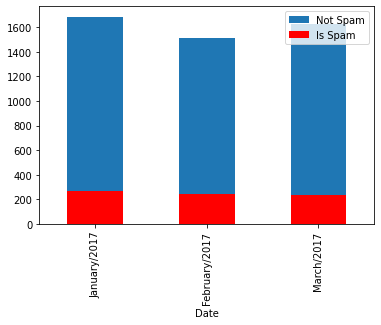

In [5]:
#Cria um dataframe apenas com duas colunas, a data e a classificacao se e spam ou nao
EmailPerMonth_df = df.filter(['Date','IsSpam'], axis=1)
EmailPerMonth_df['Date'] = pd.to_datetime(EmailPerMonth_df['Date'])

#Com esse dataframe gera outros dois, um com a quantidade de spams e o outro com a quantidade dos que nao sao spams, quantidade agrupada por mes
spamPerMonth_df = EmailPerMonth_df.where(EmailPerMonth_df.IsSpam == 'yes').groupby(pd.Grouper(key='Date', freq='1M')).count()
notSpamPerMonth_df = EmailPerMonth_df.where(EmailPerMonth_df.IsSpam == 'no').groupby(pd.Grouper(key='Date', freq='1M')).count()

#Formata o index, que nesse caso e a nova coluna data para que descreva o mes e o ano
spamPerMonth_df.index = pd.to_datetime(spamPerMonth_df.index).strftime('%B/%Y')
notSpamPerMonth_df.index = pd.to_datetime(notSpamPerMonth_df.index).strftime('%B/%Y')

#Cria um grafico de barras utilizando os dois dataframes e apresenta
ax = plt.gca()

notSpamPerMonth_df.plot(kind='bar', ax=ax)
spamPerMonth_df.plot(kind='bar', color='red', ax=ax)
ax.legend(["Not Spam", "Is Spam"]);

plt.show()

3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade
total de palavras (Word_Count) para cada mês;

---



In [6]:
#Cria um dataframe a partir do principal apenas com duas colunas, a data e o campo com a contagem de palavras comuns
new_df2 = df.filter(['Date','Word_Count'], axis=1)
new_df2['Date'] = pd.to_datetime(new_df2['Date'])

#A partir deste dataframe agrupa sempre por mes e utilizando a coluna de contagem aplica os metodos para calcular os dados necessarios
#Como min() e max() para minimo e maximo
min = new_df2.groupby(pd.Grouper(key='Date', freq='1M'))['Word_Count'].min()
max = new_df2.groupby(pd.Grouper(key='Date', freq='1M'))['Word_Count'].max()
avrg = new_df2.groupby(pd.Grouper(key='Date', freq='1M'))['Word_Count'].mean()
med = new_df2.groupby(pd.Grouper(key='Date', freq='1M'))['Word_Count'].median()
std = new_df2.groupby(pd.Grouper(key='Date', freq='1M'))['Word_Count'].std()
var = new_df2.groupby(pd.Grouper(key='Date', freq='1M'))['Word_Count'].var()

#Cria uma nova tabela em que cada coluna representa um destes dados e cada linha representa um mes para apresentar
describe_df = pd.DataFrame({'Minimum' : min, 'Maximum' : max, 'Avarage' : avrg, 'Median' : med, 'Standard Deviation' : std, 'Variance' : var})
describe_df.index = pd.to_datetime(describe_df.index).strftime('%B/%Y')
describe_df

,Minimum,Maximum,Avarage,Median,Standard Deviation,Variance
Date,,,,,,
January/2017,2,190,16.336918,13,12.557171,157.682535
February/2017,2,100,16.029043,13,11.042459,121.935908
March/2017,2,115,16.285255,12,11.576213,134.008715


4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).

---





In [7]:
#Apartir do dataframe principal buscar os emails que nao sao spam, agrupalos por dia e contar a quantidade
#Apos isso agrupar por mes e pegar de cada mes o index do valor maximo, que no caso e o dia que teve a maior quantidade
#E em outro dataframe pegar os valores maximos de cada mes
agruparDias_df = pd.DataFrame(EmailPerMonth_df.where(EmailPerMonth_df.IsSpam == 'no').groupby(pd.Grouper(key='Date', freq='1D')).count())
dias_df = agruparDias_df.groupby(pd.Grouper(freq='M')).idxmax()
quantidades_df = agruparDias_df.groupby(pd.Grouper(freq='M')).max()

#Entao transformar esses dados em uma unica tabela que mostra o dia de cada mes com a maior quantidade de emails nao spam e a quantidade
diasQuantidades_df = pd.concat([dias_df, quantidades_df], axis=1, keys=['Dias', 'Quantidades']).reset_index()
diasQuantidades_df = diasQuantidades_df.drop(diasQuantidades_df.columns[0], axis=1)
diasQuantidades_df.columns = ['Dia', 'Quantidade']
diasQuantidades_df

,Dia,Quantidade
0,2017-01-01,69
1,2017-02-13,72
2,2017-03-08,69
